<a href="https://colab.research.google.com/github/Syed-MuhammadTaha/NextWordPredictorNLP/blob/main/NextWordPredictorNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
data = open('/content/Laurences_generated_poetry.txt')
data = data.read()
corpus = data.lower().split("\n")

In [3]:
vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(corpus)
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

In [22]:
vocabulary

['',
 '[UNK]',
 'the',
 'and',
 'i',
 'to',
 'a',
 'of',
 'my',
 'in',
 'me',
 'for',
 'you',
 'all',
 'was',
 'she',
 'that',
 'on',
 'with',
 'her',
 'but',
 'as',
 'when',
 'love',
 'is',
 'your',
 'it',
 'will',
 'from',
 'by',
 'they',
 'be',
 'are',
 'so',
 'old',
 'he',
 'oh',
 'no',
 'ill',
 'at',
 'one',
 'his',
 'were',
 'there',
 'heart',
 'down',
 'where',
 'we',
 'now',
 'young',
 'never',
 'go',
 'then',
 'not',
 'did',
 'come',
 'said',
 'away',
 'them',
 'their',
 'sweet',
 'green',
 'take',
 'if',
 'our',
 'like',
 'out',
 'night',
 'town',
 'this',
 'have',
 'fair',
 'day',
 'can',
 'true',
 'thou',
 'theres',
 'see',
 'or',
 'more',
 'its',
 'had',
 'dear',
 'would',
 'up',
 'over',
 'o',
 'ive',
 'hear',
 'well',
 'through',
 'home',
 'again',
 'oer',
 'land',
 'im',
 'ye',
 'still',
 'sea',
 'long',
 'left',
 'good',
 'father',
 'wild',
 'rose',
 'morning',
 'could',
 'who',
 'eyes',
 'while',
 'took',
 'little',
 'him',
 'first',
 'bow',
 'back',
 'an',
 'some',
 

In [4]:
input_sequence = []
for line in corpus:
  sequence = vectorize_layer(line)
  for i in range(1, len(sequence)):
    n_gram = sequence[:i+1]
    input_sequence.append(n_gram)

In [5]:
max_length = max([len(x) for x in input_sequence])
max_length

16

In [6]:
input_sequence = tf.keras.utils.pad_sequences(input_sequence, maxlen=max_length, padding='pre')

In [7]:
input_sequence.shape

(11972, 16)

In [8]:
X = input_sequence[:,:-1]
y = input_sequence[:,-1]

In [9]:
y = tf.keras.utils.to_categorical(y, num_classes = vocab_size)

In [10]:
vocab_size

2704

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length-1,)),
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=False)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X,y, epochs = 100)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0652 - loss: 6.9226
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0768 - loss: 6.2474
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0874 - loss: 5.9256
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0962 - loss: 5.6457
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1163 - loss: 5.3396
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1295 - loss: 5.0250
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1518 - loss: 4.7566
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1673 - loss: 4.4632
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1949 - loss: 4.2017
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2397 - loss: 3.8907
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2884 - loss: 3.5923
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━

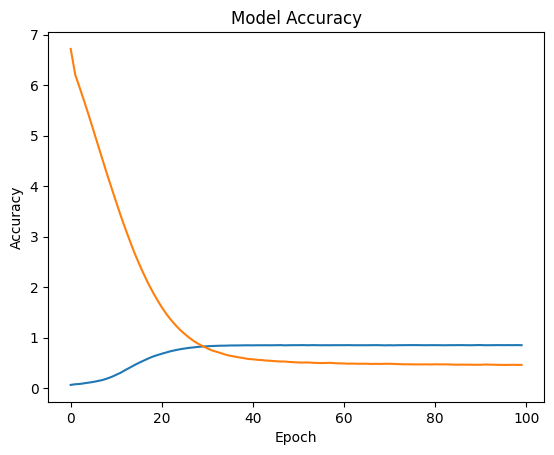

In [19]:
# plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [42]:
seed_text = "Taha went to dublin"


In [25]:
sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_length-1, padding='pre')
probabilities = model.predict(sequence)
word = np.argmax(probabilities, axis = -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


In [29]:
word[0]

143

In [34]:
output = vocabulary[word[0]]
seed_text += " " + output

In [37]:
seed_text

'Taha is lost in the rain'

In [43]:
next_words = 100
for _ in range(100):
  tokenize = vectorize_layer(seed_text)
  tokenize = tf.keras.utils.pad_sequences([tokenize], maxlen=max_length-1, padding='pre')
  probabilities = model.predict(tokenize)
  word = np.argmax(probabilities, axis = -1)
  output = vocabulary[word[0]]
  seed_text += " " + output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [44]:
print(seed_text)

Taha went to dublin and while that boy in the clay shines take there there love gone gone gone and gone gone and gone and gone and immortal rocky rocky woods eyes rocky rocky eyes singing gone gone gone right gone gone gone gone gone gone dawning rocky rocky rocky eyes rocky rocky eyes gone joy rocky rocky rocky rocky rocky gone stay eyes rocky rocky eyes rocky rocky eyes eyes eyes gone gone gone gone rocky rocky eyes gone gone joy gone gone tomorrow rocky rocky rocky eyes rocky rocky eyes rocky rocky eyes sweethearts dawning rocky rocky eyes eyes gone gone gone
